In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')


In [91]:
team_name = "Royal Challengers Bangalore"
df(tail)
team_matches = df[(df['batting_team'] == team_name) | (df['bowling_team'] == team_name)]
print(team_matches.head())

   Unnamed: 0  match_id        date match_type             event_name  \
0      131970    335982  2008-04-18        T20  Indian Premier League   
1      131971    335982  2008-04-18        T20  Indian Premier League   
2      131972    335982  2008-04-18        T20  Indian Premier League   
3      131973    335982  2008-04-18        T20  Indian Premier League   
4      131974    335982  2008-04-18        T20  Indian Premier League   

   innings           batting_team                 bowling_team  over  ball  \
0        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     1   
1        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     2   
2        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3   
3        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     3   
4        1  Kolkata Knight Riders  Royal Challengers Bangalore     0     4   

   ...  team_runs team_balls  team_wicket  new_batter  batter_runs  \
0  ...          1     

In [51]:
print(df.columns)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

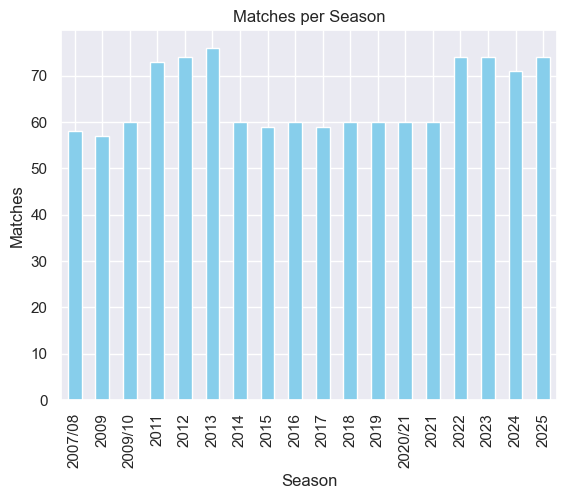

In [48]:
df = df.drop_duplicates(subset='match_id') 
df['season'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Matches")

plt.show()


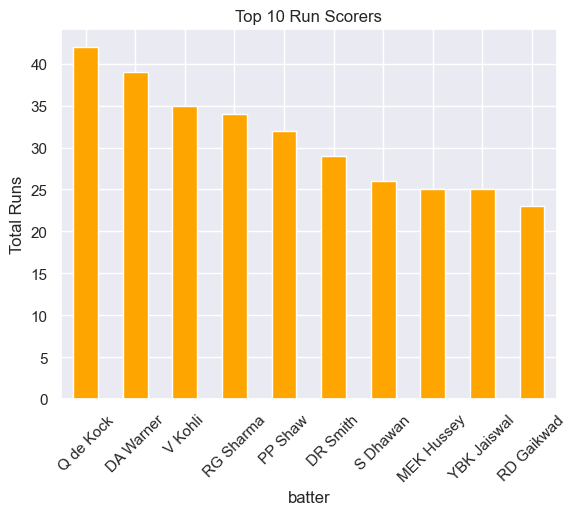

In [49]:
df = df.drop_duplicates(subset='match_id') 
df.groupby('batter')['batter_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Run Scorers")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()


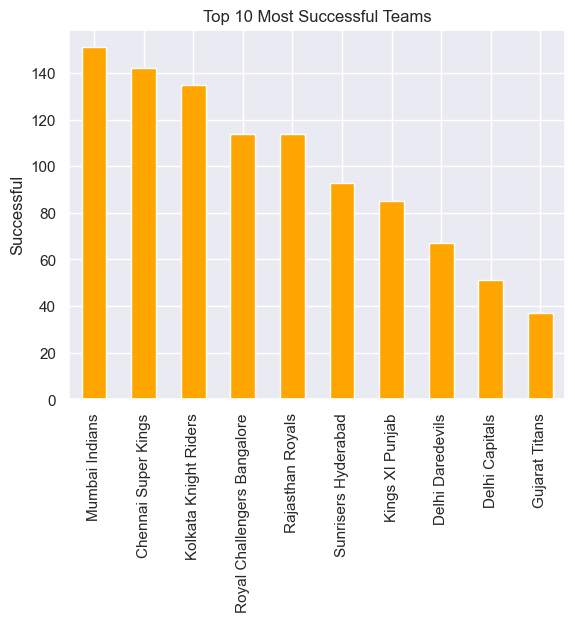

In [50]:
df = df.drop_duplicates(subset='match_id') 
df['match_won_by'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Most Successful Teams")
plt.ylabel("Successful")
plt.show()


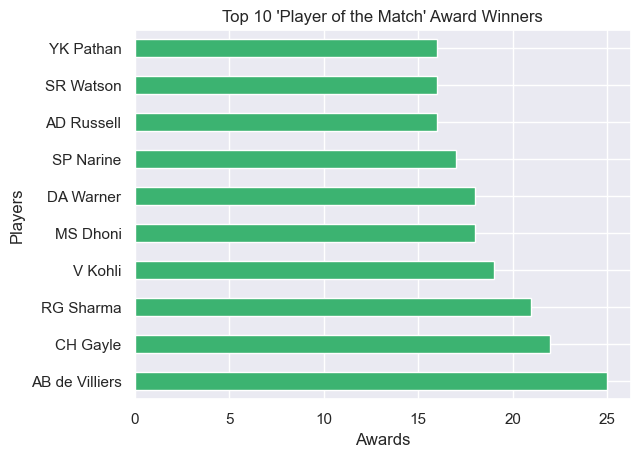

In [47]:
df = df.drop_duplicates(subset='match_id') 
df['player_of_match'].value_counts().head(10).plot(kind='barh', color='mediumseagreen')
plt.title("Top 10 'Player of the Match' Award Winners")
plt.xlabel("Awards")
plt.ylabel("Players")
plt.show()



       Bowler  Wickets
0   YS Chahal      221
1     B Kumar      198
2   SP Narine      192
3   PP Chawla      192
4    R Ashwin      188
5   JJ Bumrah      186
6    DJ Bravo      183
7    A Mishra      174
8   RA Jadeja      170
9  SL Malinga      170


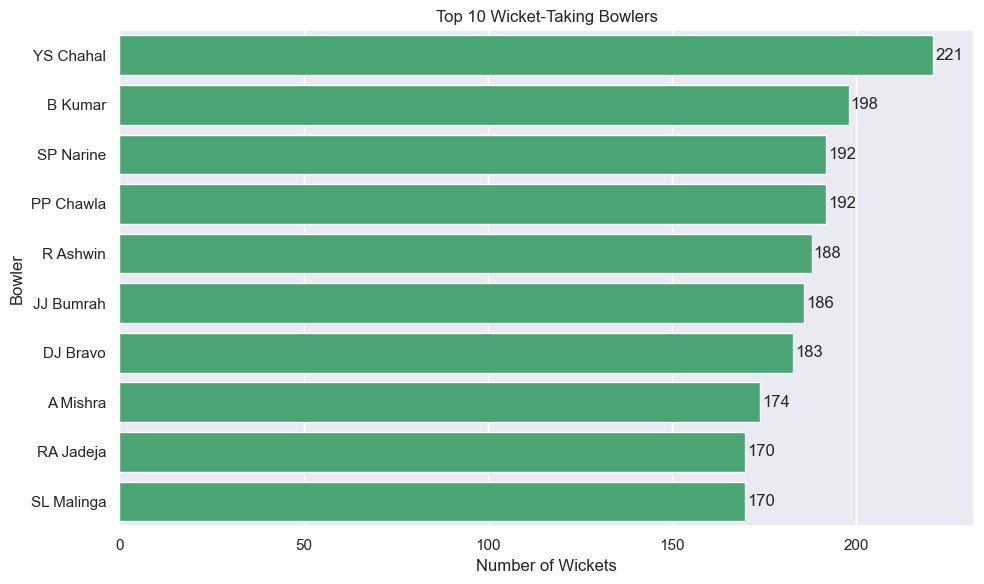

In [69]:


# Step 1: Remove rows with no wicket
df_wickets = df[df['wicket_kind'].notna()]  # Ensure this column exists

# Step 2: Exclude "run out" — not credited to bowler
df_wickets = df_wickets[df_wickets['wicket_kind'] != 'run out']

# Step 3: Count how many times each bowler took a valid wicket
bowler_counts = df_wickets['bowler'].value_counts().head(10).reset_index()
bowler_counts.columns = ['Bowler', 'Wickets']

print(bowler_counts)  # 👈 Make sure values like 15, 18, 20 appear here

# Step 4: Plot
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=bowler_counts, x='Wickets', y='Bowler', color='mediumseagreen')

# Optional: Add text labels on bars
for bar in plot.containers[0]:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.title("Top 10 Wicket-Taking Bowlers")
plt.xlabel("Number of Wickets")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

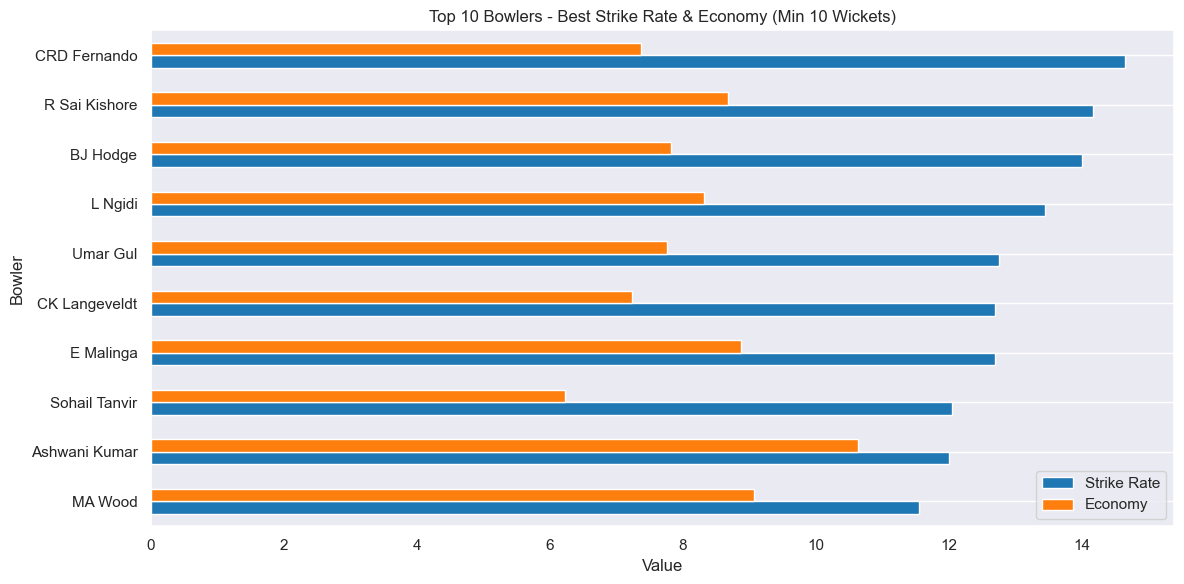

In [79]:



balls_bowled = df.groupby('bowler').count()['ball']  # counts number of deliveries


runs_conceded = df.groupby('bowler')['runs_total'].sum()


valid_wickets = df[(df['wicket_kind'].notna()) & (df['wicket_kind'] != 'run out')]
wickets = valid_wickets.groupby('bowler')['wicket_kind'].count()


bowling_stats = pd.DataFrame({
    'Balls': balls_bowled,
    'Runs': runs_conceded,
    'Wickets': wickets
}).fillna(0)  


bowling_stats = bowling_stats[bowling_stats['Balls'] >= 6]


bowling_stats['Economy'] = bowling_stats['Runs'] / (bowling_stats['Balls'] / 6)

bowling_stats = bowling_stats[bowling_stats['Wickets'] > 0]
bowling_stats['Strike Rate'] = bowling_stats['Balls'] / bowling_stats['Wickets']


best_bowlers = bowling_stats[bowling_stats['Wickets'] >= 10].sort_values(by='Strike Rate').head(10)


plt.figure(figsize=(12, 6))
best_bowlers[['Strike Rate', 'Economy']].plot(kind='barh', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Top 10 Bowlers - Best Strike Rate & Economy (Min 10 Wickets)")
plt.xlabel("Value")
plt.ylabel("Bowler")
plt.grid(axis='x')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


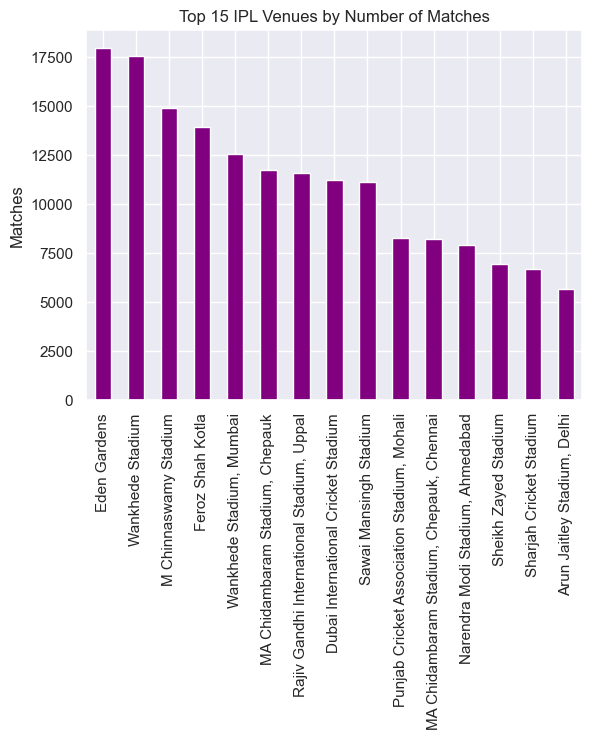

In [86]:
df['venue'].value_counts().head(15).plot(kind='bar', color='purple')
plt.title("Top 15 IPL Venues by Number of Matches")
plt.ylabel("Matches")

plt.show()


     season                 match_won_by
0   2007/08             Rajasthan Royals
1      2009              Deccan Chargers
2   2009/10          Chennai Super Kings
3      2011          Chennai Super Kings
4      2012        Kolkata Knight Riders
5      2013               Mumbai Indians
6      2014        Kolkata Knight Riders
7      2015               Mumbai Indians
8      2016          Sunrisers Hyderabad
9      2017               Mumbai Indians
10     2018          Chennai Super Kings
11     2019               Mumbai Indians
12  2020/21               Mumbai Indians
13     2021          Chennai Super Kings
14     2022               Gujarat Titans
15     2023          Chennai Super Kings
16     2024        Kolkata Knight Riders
17     2025  Royal Challengers Bengaluru


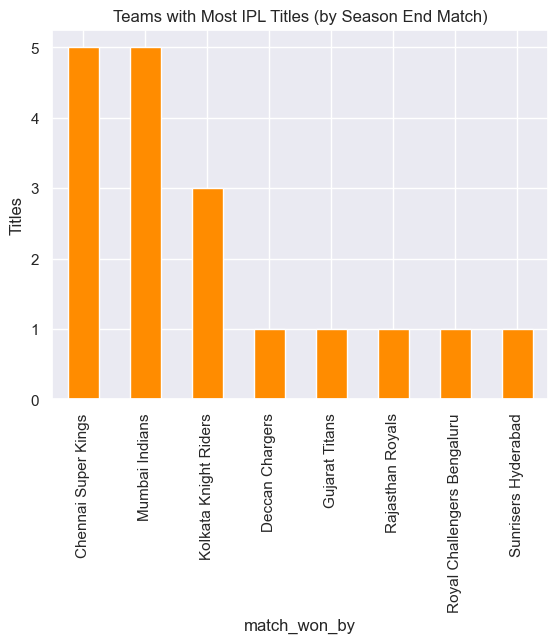

In [88]:


# Cleaned match-level DataFrame
season_winners = df.drop_duplicates(subset='season', keep='last')[['season', 'match_won_by']]
season_winners = season_winners.sort_values('season')

season_winners = season_winners.reset_index(drop=True)
print(season_winners)


# Optional plot
season_winners.groupby('match_won_by').size().sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title("Teams with Most IPL Titles (by Season End Match)")
plt.ylabel("Titles")

plt.show()
